Lab1: Complete the TODO parts in the following code. 
- Using California Housing Dataset from sklearn, select input attributes 1,3,4  as the input features. 
- Using K-fold cross validation technique (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), complete the implementation to train a regression model and report performance merics when asked in the following code. 
- For multiple degrees of model complexity (i.e., degree of polynomial in this exercise) in a for-loop, obtain the model with the minimum reducible_error, polynomial degree, and run the obtained model on the test data. For this part,you should use the split the data into train and test by [75:25] rate and report mse of the final model on test data. 
- Analyse the results of model performance according to different degrees of polynomial and the number of folds used. You can manipulate the code and share your analysis in terms of the performance of the model (mse and total error), such as for instnace which degree of the model complexity (in relation to the polynomial order) would give a better model? Feel free to include other analysis about the generated models in relation to their performance results. You can event plot the results to support your analysis. 

In [6]:
%pip install matplotlib
%pip install scikit-learn
%pip install numpy
import numpy as np

from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing


def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    variance, bias2, total_err, models = [], [], [], []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, Y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        Y_pred = model.predict(X_test)

        # Calculate variance and R^2 for this fold
        var_fold = np.mean((np.mean(Y_pred) - Y_pred) ** 2)

        r2_fold = r2_score(Y_test, Y_pred)

        bias2_fold = np.mean((np.mean(Y_pred) - Y_test) ** 2)
        total_err_fold = var_fold + bias2_fold 
        
        # Append results to lists
        variance.append(var_fold)
        bias2.append(bias2_fold)
        total_err.append(total_err_fold)
        models.append(model)

        # Print results for this fold
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(var_fold, bias2_fold, bias2_fold + var_fold))

    # print the total_error of the best model
    min_error_index = np.argmin(total_err)
    best_model = models[min_error_index]
    print("Total error of the best model is:", total_err[min_error_index])

    # Testing the final model on the test data
    X_train, X_test, y_train, Y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    # Obtain the predictions on the test data
    Y_pred = best_model.predict(X_test)
    
    # store mse score of the model applied on the test data
    mse = mean_squared_error(Y_test, Y_pred)
    return mse , best_model



# Example usage: load California Housing Dataset and select the first, third, and forth attributes as input features in X
dataset = fetch_california_housing()
X = dataset.data[:, [1, 3, 4]]
# Set the target valiable 
y = dataset.target

# Storing the MSE values for each degree and fold
mse_vals = []

degrees = range(1, 6)  # Try polynomial degrees from 1 to 5 
folds = range(4, 13)
# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
for degree in degrees:
    mse_degree = []
    for fold in folds:
        mse, _ = polynomial_regression(degree, X, y, fold, test_size=0.25, random_state=None)
        print("Degree:", degree, ", # of K-Folds:", fold, ", MSE:", mse)
        mse_degree.append(mse)
    mse_vals.append(mse_degree)



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Variance: 0.0442, Bias2: 1.3490, Total error: 1.3932
Variance: 0.0059, Bias2: 1.4786, Total error: 1.4846
Variance: 0.0256, Bias2: 1.0473, Total error: 1.0729
Variance: 0.0053, Bias2: 1.6350, Total error: 1.6403
Total error of the best model is: 1.0728548240741076
Degree: 1 , # of K-Folds: 4 , MSE: 1.3088757651902048
Variance: 0.0412, Bias2: 1.3112, Total error: 1.3524
Variance: 0.0088, Bias2: 1.1757, Total error: 1.1845
Variance: 0.0186, Bias2: 1.6176, Total error: 1.6362
Variance: 0.0078, Bias2: 1.2539, Total error: 1.2617
Variance: 0.0144, Bias2: 1.5311, Tota

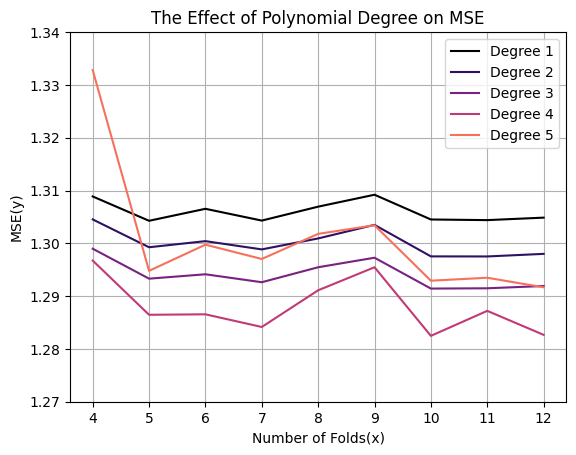

In [7]:
import matplotlib.pyplot as plt

# Plot
colors = plt.cm.magma(np.linspace(0, 0.7, len(degrees))) #Set color scheme
for i, degree in enumerate(degrees):
    plt.plot(folds, mse_vals[i], label=f'Degree {degree}', color=colors[i])
plt.title('The Effect of Polynomial Degree on MSE')
plt.xlabel('Number of Folds(x)')
plt.ylabel('MSE(y)')
plt.legend()
plt.ylim(1.27, 1.34)  # Set custom y-axis
plt.grid(True)
plt.show()

Analysis:

The input features selected are MedInc(attribute 1), AveRooms(attribute 3), and AveBedrms(attribute 4) from the California Housing Dataset. By iterating through polynomial degrees and performing k-fold cross-validation, we can see that the model with the lowest reducible error is that of a polynomial degree of 4. We can see that it provides us with the lowest mean squared error(MSE) during cross-validation, indicating that this degree of complexity best fits the data. I also think that it is important to state that adding more folds wouldn't significantly change which degree has the lowest MSE because the performance of the model will tend to stabilize after a certain point. In conclusion, the analysis suggests that a polynomial degree of 4 is optimal for this dataset as it best balances the tradeoffs between analysis and vairance.